In [1]:
import math
import operator 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

In [2]:
'''
Finds euclidiean distance b/w 2 point
sqrt((x1-x2)^2+(y1-y2)^2)
'''
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += pow((data1[x] - data2[x]), 2)
    return math.sqrt(distance)

In [3]:
'''Finds k-nearest neighbour to the given data point'''
def getKNeighbours(trainingSet, testData, k):
    distances = []
    for x in range(len(trainingSet)):  # Calcualtes distance of point of training set from the test data point
        dist = euclideanDistance(testData, trainingSet[x], len(testData)) 
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbours = []
    for x in range(k): # K-nearest neighours
        neighbours.append(distances[x][0])
    return neighbours

In [4]:
# Train and test datasets
trainSet = [[4, 4,'blue'], [6, 2,'blue'],[2,4,'orange'],[6,4,'orange'],[4,6,'orange'],[4,2,'orange']]
testSet = [6, 6 ]
k = 3
neighbours = getKNeighbours(trainSet, testSet, k)
print('Neighbours :',neighbours)

Neighbours : [[6, 4, 'orange'], [4, 6, 'orange'], [4, 4, 'blue']]


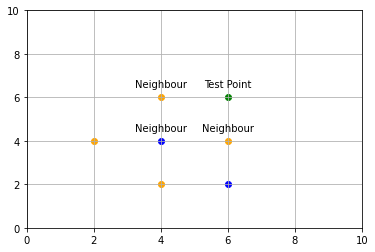

In [5]:
#plotting the datapoints and neightbours
plt.plot()
for item in trainSet:
    plt.scatter(item[0],item[1],c=item[2])
label = 'Neighbour'
for item in neighbours:
    plt.annotate(label,(item[0],item[1]),textcoords="offset points",xytext=(0,10),ha='center') 

plt.scatter(testSet[0],testSet[1],c='green',label='test')
label = 'Test Point'
plt.annotate(label,(testSet[0],testSet[1]),textcoords="offset points",xytext=(0,10),ha='center') 
plt.grid()
plt.axis([0, 10, 0 , 10])
plt.show()

In [6]:
#predicts the class of test data based on the k-nearest neighbours
def predict(neighbours):
    classVotes = {} # dictionary with labels and their counters
    for x in range(len(neighbours)):
        response = neighbours[x][-1]   # gets label 
        if response in classVotes:
            classVotes[response] += 1  # increase vote counter of label
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [7]:
print('Prediction for test data points :',predict(neighbours))

Prediction for test data points : orange


In [8]:
# weighted k-nearest neighbours
def getKWeightedNeighbours(trainingSet, testData, k):
    distances = []
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testData, trainingSet[x], len(testData))
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbours = []
    for x in range(k):
        neighbours.append(distances[x][0])
    classVotes = {}
    
    #kernel to assign weights to neighbours
    for x in range(len(neighbours)):
        response = neighbours[x][-1]
        if response in classVotes:
            classVotes[response] += 1/distances[x][1] 
        else:
            classVotes[response] = 1/distances[x][1]
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    print('Weighted Votes:',sortedVotes)
    return neighbours, sortedVotes[0][0]

In [9]:
neighbours,predictions = getKWeightedNeighbours(trainSet, testSet, k)
print('Neighbours :',neighbours)
print('Prediction for test data :',predictions)

Weighted Votes: [('orange', 1.0), ('blue', 0.35355339059327373)]
Neighbours : [[6, 4, 'orange'], [4, 6, 'orange'], [4, 4, 'blue']]
Prediction for test data : orange


In [10]:
df = pd.DataFrame(trainSet)
x = df.drop(df.columns[2],axis = 1)
y = df.iloc[:,2:3]
x,y

(   0  1
 0  4  4
 1  6  2
 2  2  4
 3  6  4
 4  4  6
 5  4  2,
         2
 0    blue
 1    blue
 2  orange
 3  orange
 4  orange
 5  orange)

In [11]:
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=42) 
  
knn = KNeighborsClassifier(n_neighbors=3)   
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 

# Predict on dataset which model has not seen before 
print(y_pred) 
print(y_test)

['orange' 'orange' 'orange']
        2
0    blue
1    blue
5  orange


<ipython-input-11-4fd5d538a447>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


In [12]:
print(knn.predict([[6,6]]))

['orange']


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.3333333333333333